In [9]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import cv2
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

## Task 1

In [10]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [6]:
img = cv2.imread('cat_new.jpg', cv2.IMREAD_GRAYSCALE)

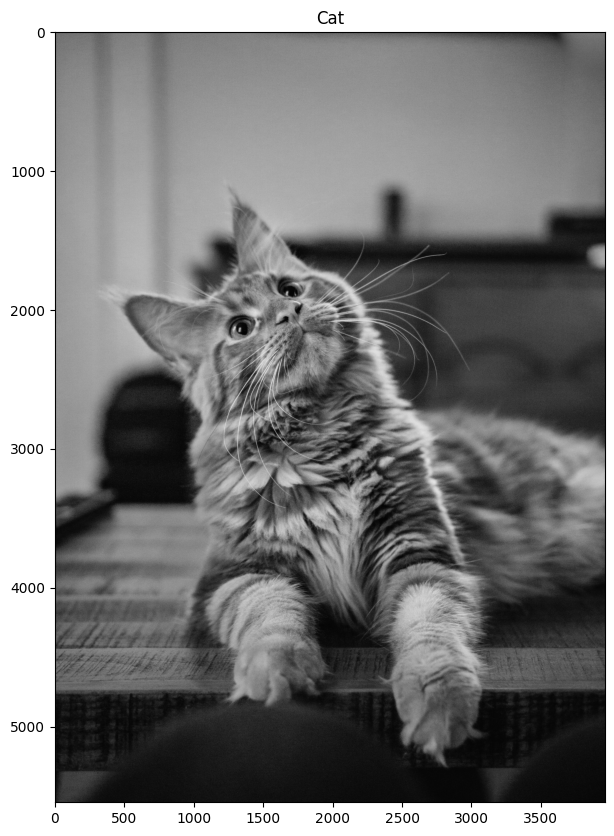

In [11]:
imshow('Cat', img)

In [12]:
dct = cv2.dct(np.float32(img))

In [13]:
idct = cv2.idct(dct)

In [16]:
cv2.imwrite('dct_image.jpg', dct)
cv2.imwrite('idct_image.jpg', idct)

True

## Task 2

In [18]:
import gzip

In [40]:
f_in = open('text.txt')
f_in_str = str(f_in)
f_out = gzip.open('file.txt.gz', 'wb')
f_out.write(f_in_str.encode("utf-8"))
f_out.close()
f_in.close()

## Task 3

In [42]:
import heapq  
from collections import Counter  
from collections import namedtuple

# Кодування

class Node(namedtuple("Node", ["left", "right"])):  
    def walk(self, code, acc):
        self.left.walk(code, acc + "0")  
        self.right.walk(code, acc + "1")  

class Leaf(namedtuple("Leaf", ["char"])):  
    def walk(self, code, acc):
        code[self.char] = acc or "0"  

def huffman_encode(s):  
    h = []  
    for ch, freq in Counter(s).items(): 
        h.append((freq, len(h), Leaf(ch)))  
    heapq.heapify(h)  
    count = len(h) 
    while len(h) > 1:  
        freq1, _count1, left = heapq.heappop(h)  
        freq2, _count2, right = heapq.heappop(h)  
 
        heapq.heappush(h, (freq1 + freq2, count, Node(left, right))) 
                                                                     
        count += 1 
    code = {}  
    if h:  
        [(_freq, _count, root)] = h  
        root.walk(code, "")  #
    return code  

def main():
    s = input()  
    code = huffman_encode(s)  
    encoded = "".join(code[ch] for ch in s) 
                                             
    print(len(code), len(encoded))  
    for ch in sorted(code): 
        print("{}: {}".format(ch, code[ch]))  
    print(encoded) 

In [ ]:
 # Декодування
    def huffman_decode(encoded, code):  
    sx =[] 
    enc_ch = ""  
    for ch in encoded:  
        enc_ch += ch  
        for dec_ch in code:  
            if code.get(dec_ch) == enc_ch:  
                sx.append(dec_ch)  
                enc_ch = ""  
                break
    return "".join(sx)  

